# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('assignment2_train-data.csv')

In [3]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape

(6019, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
##Unnamed는 행의 index와 동일하여 무의미하고, New_Price는 결측치가 매우 많아 제거
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['New_Price'], axis=1, inplace=True)

In [8]:
## Seats의 결측치를 평균값으로 대체
data.Seats = data.Seats.fillna(np.mean(data.Seats))

In [9]:
# 단위가 붙어서 str 타입이었던 변수들을 수치만 뽑아 연속형 변수로 변경
data.Mileage = pd.to_numeric(data.Mileage.str.split().str[0]).fillna(np.mean(pd.to_numeric(data.Mileage.str.split().str[0])))
data.Engine = pd.to_numeric(data.Engine.str.split().str[0]).fillna(np.mean(pd.to_numeric(data.Engine.str.split().str[0])))
data.Power = pd.to_numeric(data.Power.str.split().str[0], errors='coerce').fillna(np.mean(pd.to_numeric(data.Power.str.split().str[0], errors='coerce')))

범주형 변수의 분포를 살펴본 결과, Name과 Location은 범주가 너무 많아서 변수에서 제외, Fuel_Type, Transmission, Owner_Type는 더미 변수로 만들기로 함.

In [10]:
data.Name.value_counts()
data.drop(['Name'], axis=1, inplace=True)

In [11]:
data.Location.value_counts()
data.drop(['Location'], axis=1, inplace=True)

In [13]:
data.Fuel_Type.value_counts()
dummy1 = pd.get_dummies(data.Fuel_Type)
dummy1.drop(dummy1.columns[-1], axis=1, inplace=True) ## 다중공선성을 막기 위해 하나를 drop, 어차피 범주를 구분해주도록 필요한 가변수의 개수는 범주개수-1
dummy1.head()

,CNG,Diesel,Electric,LPG
0,1,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,1,0,0


In [14]:
data.Transmission.value_counts()
dummy2 = pd.get_dummies(data.Transmission)
dummy2.drop(dummy2.columns[-1], axis=1, inplace=True)
dummy2.head()

,Automatic
0,0
1,0
2,0
3,0
4,1


In [15]:
data.Owner_Type.value_counts()
dummy3 = pd.get_dummies(data.Owner_Type)
dummy3.drop(dummy3.columns[-1], axis=1, inplace=True)
dummy3.head()

,First,Fourth & Above,Second
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [16]:
data.drop(['Fuel_Type', 'Transmission', 'Owner_Type'], axis=1, inplace=True)
data= pd.concat([data, dummy1, dummy2, dummy3], axis=1)
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,Electric,LPG,Automatic,First,Fourth & Above,Second
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,1,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,1


In [17]:
X = data.drop(['Price'], axis=1)
y = data.Price

# EDA

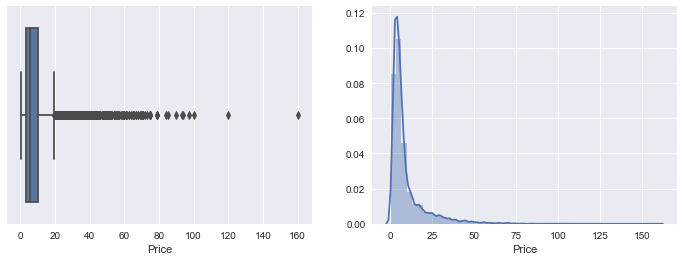

In [18]:
plt.style.use('seaborn')
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(y, ax=ax1)
sns.distplot(y,ax=ax2)

매우 왼쪽으로 skewed, 오른쪽으로 꼬리가 긴 분포를 띄고 있기 때문에 log변환 필요

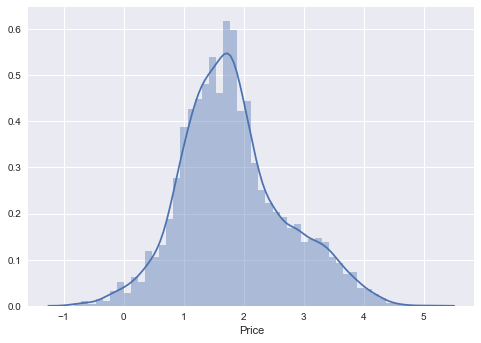

In [19]:
y = np.log(y)
sns.distplot(y)

로그 변환 결과 대칭의 정규성을 만족한다고 볼 수 있음.

In [20]:
X.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,CNG,Diesel,Electric,LPG,Automatic,First,Fourth & Above,Second
Year,1.000000,-0.173048,3.215336e-01,-0.051712,0.013895,0.012204,0.019023,0.126185,7.907273e-04,-0.031919,0.097059,0.373494,-0.077886,-0.297913
Kilometers_Driven,-0.173048,1.000000,-6.525316e-02,0.091029,0.033419,0.083072,-0.003496,0.104441,-2.345021e-03,0.000549,-0.025663,-0.078563,0.032659,0.062143
Mileage,0.321534,-0.065253,1.000000e+00,-0.588354,-0.506801,-0.303086,0.154064,0.113106,2.017007e-16,0.011131,-0.333096,0.151470,-0.049101,-0.122522
Engine,-0.051712,0.091029,-5.883536e-01,1.000000,0.859020,0.393087,-0.085709,0.426749,-2.087046e-02,-0.040411,0.499082,-0.049160,0.019378,0.042432
Power,0.013895,0.033419,-5.068014e-01,0.859020,1.000000,0.100200,-0.086587,0.288974,-1.926825e-02,-0.040880,0.638835,-0.029557,-0.004626,0.030194
Seats,0.012204,0.083072,-3.030863e-01,0.393087,0.100200,1.000000,-0.029221,0.307573,-6.305379e-03,-0.014109,-0.075250,-0.003852,0.041454,-0.004845
CNG,0.019023,-0.003496,1.540643e-01,-0.085709,-0.086587,-0.029221,1.000000,-0.103422,-1.766797e-03,-0.003953,-0.061297,-0.003859,-0.003750,0.004682
Diesel,0.126185,0.104441,1.131064e-01,0.426749,0.288974,0.307573,-0.103422,1.000000,-1.945705e-02,-0.043536,0.141613,0.039260,0.001790,-0.025779
Electric,0.000791,-0.002345,2.017007e-16,-0.020870,-0.019268,-0.006305,-0.001767,-0.019457,1.000000e+00,-0.000744,0.028823,0.008574,-0.000706,-0.007981
LPG,-0.031919,0.000549,1.113136e-02,-0.040411,-0.040880,-0.014109,-0.003953,-0.043536,-7.437447e-04,1.000000,-0.025804,-0.002003,-0.001579,0.004350


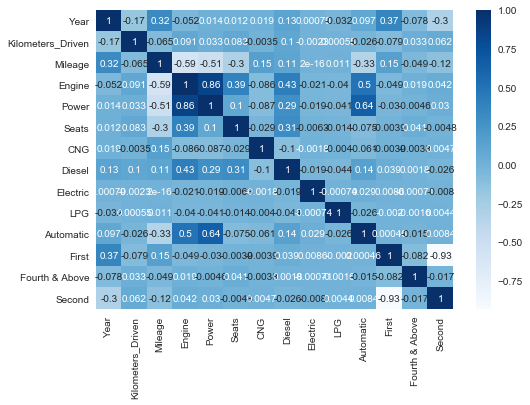

In [21]:
sns.heatmap(data = X.corr(), annot=True, cmap='Blues')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,196.874006,Year
5,75.320462,Seats
3,62.680423,Engine
11,45.496309,First
2,38.605047,Mileage
4,33.293176,Power
13,9.630134,Second
7,3.889823,Diesel
10,2.487096,Automatic
1,1.457984,Kilometers_Driven


In [24]:
X.drop(['Year'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
2,61.871174,Engine
4,47.361615,Seats
10,35.371737,First
3,32.317548,Power
1,21.255563,Mileage
12,7.392454,Second
6,3.152238,Diesel
9,2.475415,Automatic
0,1.448990,Kilometers_Driven
11,1.060299,Fourth & Above


In [25]:
X.drop(['Engine'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
9,35.284431,First
3,29.477409,Seats
1,17.684528,Mileage
2,10.898493,Power
11,7.371531,Second
5,2.682438,Diesel
8,2.470690,Automatic
0,1.444655,Kilometers_Driven
10,1.059794,Fourth & Above
4,1.048516,CNG


In [26]:
X.drop(['First'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,18.937492,Seats
1,10.577062,Mileage
2,10.144926,Power
5,2.527922,Diesel
8,2.458515,Automatic
0,1.444619,Kilometers_Driven
10,1.198257,Second
4,1.043198,CNG
9,1.006891,Fourth & Above
7,1.004495,LPG


In [27]:
X.drop(['Seats'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
2,6.624882,Power
1,4.078381,Mileage
4,2.520686,Diesel
7,2.347866,Automatic
0,1.421976,Kilometers_Driven
9,1.186191,Second
3,1.041133,CNG
6,1.004234,LPG
8,1.003347,Fourth & Above
5,1.003249,Electric


In [28]:
X.head()

,Kilometers_Driven,Mileage,Power,CNG,Diesel,Electric,LPG,Automatic,Fourth & Above,Second
0,72000,26.60,58.16,1,0,0,0,0,0,0
1,41000,19.67,126.20,0,1,0,0,0,0,0
2,46000,18.20,88.70,0,0,0,0,0,0,0
3,87000,20.77,88.76,0,1,0,0,0,0,0
4,40670,15.20,140.80,0,1,0,0,1,0,1


VIF값이 10이 넘어가는 변수 Year, Engine, First, Seats 모두 제거

# Modeling

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_train)

# 모델 평가

In [31]:
model.score(X_train, y_train)

0.6793925965352898

In [32]:
mean_squared_error(y_train, pred)

0.2446418340319844

In [33]:
model.score(X_test, y_test)

0.7016616894292719

In [34]:
from sklearn.linear_model import Ridge, Lasso

#Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge score:', ridge.score(X_train,y_train))

#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
print('Lasso score:', lasso.score(X_train,y_train))

Ridge score: 0.6793262413593342
Lasso score: 0.5814630167753144


In [36]:
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              9527.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        22:53:18   Log-Likelihood:                         -4282.4
No. Observations:                6019   AIC:                                      8585.
Df Residuals:                    6009   BIC:                                      8652.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

CNG와 LPG 변수가 유의수준 0.05 기준으로 유의하지 않으므로 후진 소거

In [37]:
import statsmodels.api as sm

X2 = X.drop(["CNG"], axis=1)
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.059e+04
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        22:53:46   Log-Likelihood:                         -4282.4
No. Observations:                6019   AIC:                                      8583.
Df Residuals:                    6010   BIC:                                      8643.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [38]:
import statsmodels.api as sm

X3 = X2.drop(["LPG"], axis=1)
model = sm.OLS(y, X3)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.191e+04
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        22:54:01   Log-Likelihood:                         -4282.6
No. Observations:                6019   AIC:                                      8581.
Df Residuals:                    6011   BIC:                                      8635.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# 회귀분석 기본 가정 검토

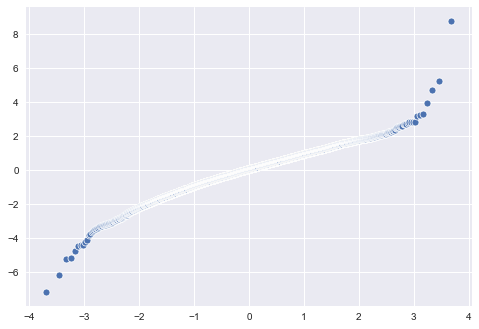

In [39]:
import scipy.stats

residual = y - result.predict()
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)

잔차가 어느 정도 정규성을 만족하는 것으로 판단.

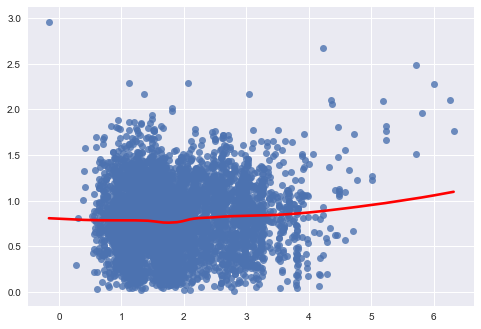

In [40]:
pred = result.predict(X3)
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

잔차의 분포가 어느정도 수평을 띄고 있을 것을 보아 등분산성을 만족하는 것으로 판단.